In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("datasets/final_datasets/pollution_train_2012_2020_scaled_interactions.csv")
test  = pd.read_csv("datasets/final_datasets/pollution_test_2021_2023_scaled_interactions.csv")

In [4]:
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# y_true: true test labels
# y_pred_with: predictions with interaction
# y_pred_without: predictions without interaction
def ttest(y_test, y_pred_interaction, y_pred_no_interaction):
    err_with = (y_test - y_pred_interaction) ** 2
    err_without = (y_test - y_pred_no_interaction) ** 2

    t_stat, p_value = ttest_rel(err_without, err_with)
    diff = err_without - err_with  # positive means improvement

    print(f"t = {t_stat:.3f}, p = {p_value:.4g}")
    plt.figure(figsize=(6,4))
    plt.hist(diff, bins=20, color='skyblue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--', label='No difference')
    plt.xlabel('Squared error difference (without - with interaction)')
    plt.ylabel('Count')
    plt.title('Per-sample error difference')
    plt.legend()
    plt.show()

    # 2. Boxplot of errors
    plt.figure(figsize=(6,4))
    plt.boxplot([err_without, err_with], labels=['Without', 'With'])
    plt.ylabel('Squared error')
    plt.title('Comparison of per-sample errors')
    plt.show()

In [5]:

core_features = [
    "traffic_daily_total",
    "temperature_2m_max",
    "wind_speed_10m_max_(km/h)",
    "precipitation_sum_(mm)",
    "relative_humidity_2m_max_(%)",
]

extra_features = [
    "daylight_duration_(s)",
    "sunshine_duration_(s)",
    "rain_sum_(mm)",
    "snowfall_sum_(cm)",
    "wind_direction_10m_dominant_(°)",
    "et0_fao_evapotranspiration_(mm)",
    "shortwave_radiation_sum_(mj/m²)",
    "dew_point_2m_max",
    "cloud_cover_max_(%)",
    "cloud_cover_mean_(%)",
    "pressure_msl_max_(hpa)",
    "surface_pressure_max_(hpa)",
    "vapour_pressure_deficit_max_(kpa)",
]
confounder_features = ["season_spring", "season_summer", "season_fall", "is_weekend", "is_covid"]

interaction_features = [
    "int_traffic_temp",
    "int_traffic_wind",
    "int_traffic_precip",
    "int_traffic_humidity",
]

## MLR: NO2

In [6]:
from sklearn.linear_model import LinearRegression

base_features_no_conf = core_features + extra_features

base_features_with_conf = core_features + extra_features + confounder_features

target = "NO2"
feat_list = base_features_with_conf + ["int_traffic_humidity"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]
y_test  = test[target]

model_confounders = LinearRegression()
model_confounders.fit(X_train, y_train)
y_pred_with_confounders = model_confounders.predict(X_test)

feat_list_no_conf = base_features_no_conf + ["int_traffic_humidity"]
X_train = train[feat_list_no_conf]
y_train = train[target]
X_test  = test[feat_list_no_conf]

model_no_confounders = LinearRegression()
model_no_confounders.fit(X_train, y_train)
y_pred_no_confounders = model_no_confounders.predict(X_test)

t = 2.977, p = 0.003067


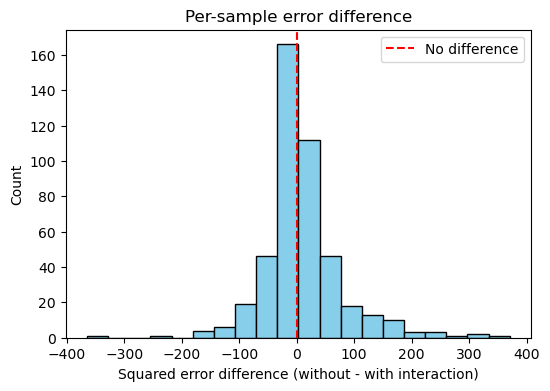

C:\Users\User1\AppData\Local\Temp\ipykernel_14464\1260792264.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_without, err_with], labels=['Without', 'With'])


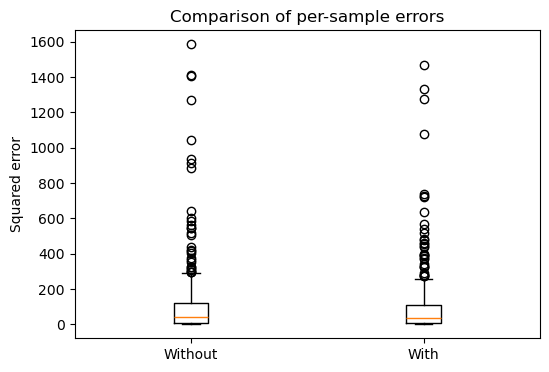

In [7]:
ttest(y_test, y_pred_with_confounders, y_pred_no_confounders)

### MLR: PM2.5

In [8]:

base_features_no_conf = core_features + extra_features

base_features_with_conf = core_features + extra_features + confounder_features

target = "PM2.5"
feat_list = base_features_with_conf + ["int_traffic_temp"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]
y_test  = test[target]

model_confounders = LinearRegression()
model_confounders.fit(X_train, y_train)
y_pred_with_confounders = model_confounders.predict(X_test)

feat_list_no_conf = base_features_no_conf + ["int_traffic_temp"]
X_train = train[feat_list_no_conf]
y_train = train[target]
X_test  = test[feat_list_no_conf]

model_no_confounders = LinearRegression()
model_no_confounders.fit(X_train, y_train)
y_pred_no_confounders = model_no_confounders.predict(X_test)

t = 1.430, p = 0.1533


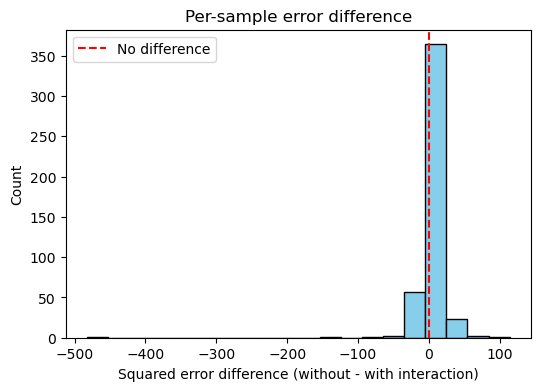

C:\Users\User1\AppData\Local\Temp\ipykernel_14464\1260792264.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_without, err_with], labels=['Without', 'With'])


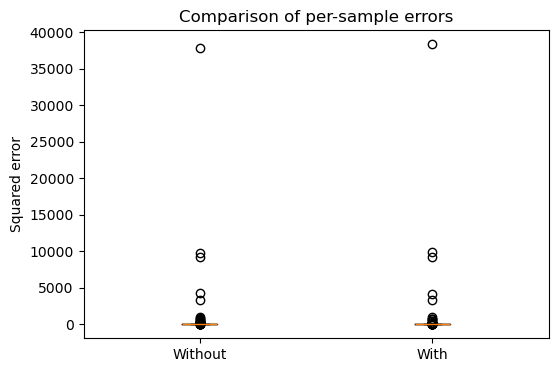

In [9]:
ttest(y_test, y_pred_with_confounders, y_pred_no_confounders)

### RF + O3

In [10]:
from sklearn.ensemble import RandomForestRegressor

target = "Ozone"
feat_list = base_features_no_conf + ["int_traffic_wind"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]
y_test  = test[target]

rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=50,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=0,
        n_jobs=-1,
    )

rf.fit(X_train, y_train)

y_pred_no_confounders = rf.predict(X_test)

feat_list = base_features_with_conf + ["int_traffic_wind"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]

rf_conf = RandomForestRegressor(
        n_estimators=300,
        max_depth=50,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=0,
        n_jobs=-1,
)

rf_conf.fit(X_train, y_train)
y_pred_with_confounders = rf_conf.predict(X_test)

t = 0.548, p = 0.5838


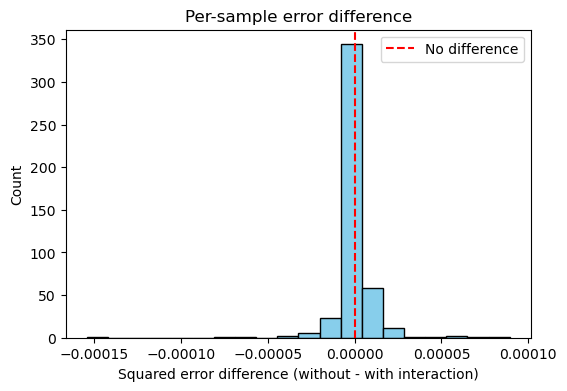

C:\Users\User1\AppData\Local\Temp\ipykernel_14464\1260792264.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_without, err_with], labels=['Without', 'With'])


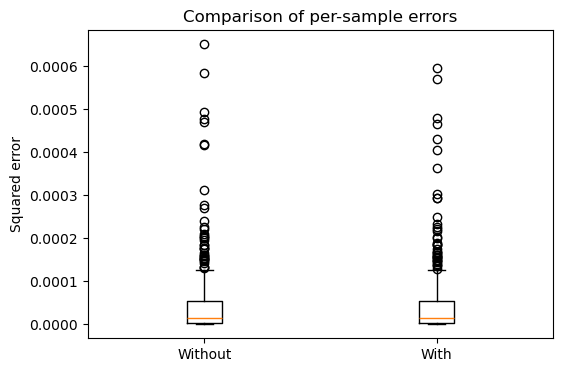

In [11]:
ttest(y_test, y_pred_with_confounders, y_pred_no_confounders)

### RF + CO

In [12]:
from sklearn.ensemble import RandomForestRegressor

target = "CO"
feat_list = base_features_no_conf + ["int_traffic_wind"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]
y_test  = test[target]

rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=0,
        n_jobs=-1,
    )

rf.fit(X_train, y_train)

y_pred_no_confounders = rf.predict(X_test)

feat_list = base_features_with_conf + ["int_traffic_wind"]

X_train = train[feat_list]
y_train = train[target]
X_test  = test[feat_list]

rf_conf = RandomForestRegressor(
        n_estimators=300,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=0,
        n_jobs=-1,
)

rf_conf.fit(X_train, y_train)
y_pred_with_confounders = rf_conf.predict(X_test)

t = -1.639, p = 0.102


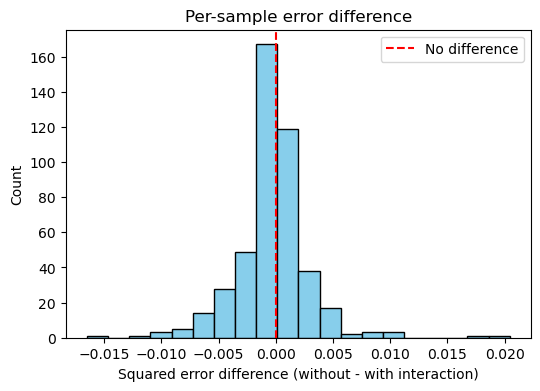

C:\Users\User1\AppData\Local\Temp\ipykernel_14464\1260792264.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([err_without, err_with], labels=['Without', 'With'])


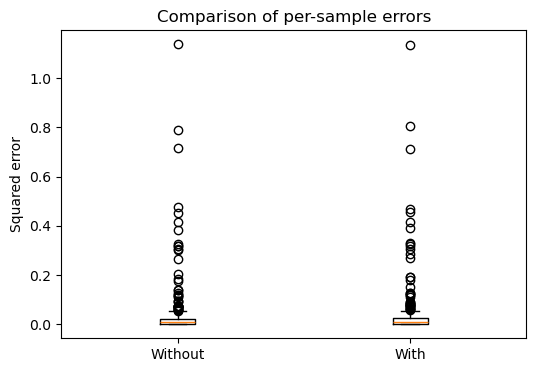

In [13]:
ttest(y_test, y_pred_with_confounders, y_pred_no_confounders)